### Telecom_Industry_case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('G:\GL_data_science\Case Study\CSV Files\Telecom_Industry.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Here we see that the target variable is 'Churn'

In [3]:
print('No. of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df_shape = df.shape[0]

No. of Rows: 3333
No. of Columns: 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3331 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


### EDA

In [5]:
df.RoamMins.isna().sum()

2

There are two null values in 'RoamMins', as this is a numerical variable, thus we can fill the null value with median.

In [6]:
df.RoamMins.fillna(value = df.RoamMins.median(), inplace=True)

In [7]:
df.RoamMins.isna().sum()

0

In [8]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

Now, no null value in dataset.

**Checking for Categorical & Numerical variables**

In [9]:
for i in df.columns:
    print(df[i].value_counts())

0    2850
1     483
Name: Churn, dtype: int64
105    43
87     42
93     40
101    40
90     39
86     38
95     38
116    37
100    37
112    36
107    36
99     36
120    35
127    35
123    35
106    34
122    34
88     34
103    33
80     33
92     33
94     33
98     32
74     32
119    32
117    32
73     32
75     32
64     32
113    32
       ..
9       3
7       2
204     2
186     2
210     2
212     2
195     2
224     2
196     2
18      2
205     2
225     2
6       2
217     2
8       1
4       1
26      1
243     1
188     1
200     1
202     1
208     1
232     1
5       1
175     1
191     1
199     1
215     1
221     1
2       1
Name: AccountWeeks, Length: 212, dtype: int64
1    3010
0     323
Name: ContractRenewal, dtype: int64
0    2411
1     922
Name: DataPlan, dtype: int64
0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
0.33      32
0.32      30
0.30      29
0.28      29
0.27      27
0.34      25
0.24      24
0.35      23
0.23      22
2.57      2

**Categorical = Churn, ContractRenewal, DataPlan, CustServCalls**
**Numerical = AccountWeeks, DataUsage, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins**

In [10]:
# Converting the data type of categorical variables to 'category'
df[['Churn', 'ContractRenewal', 'DataPlan', 'CustServCalls']]=df[['Churn', 'ContractRenewal', 'DataPlan', 'CustServCalls']].astype('category')

In [11]:
df.dtypes

Churn              category
AccountWeeks          int64
ContractRenewal    category
DataPlan           category
DataUsage           float64
CustServCalls      category
DayMins             float64
DayCalls              int64
MonthlyCharge       float64
OverageFee          float64
RoamMins            float64
dtype: object

In [12]:
# 5 Points Summary
df.describe()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.816475,179.775098,100.435644,56.305161,10.051488,10.237384
std,39.822106,1.272668,54.467389,20.069084,16.426032,2.535712,2.791837
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,5.400000,350.800000,165.000000,111.300000,18.190000,20.000000


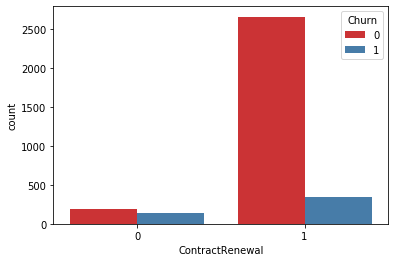

In [13]:
# Countplot for Categorical Variable
sns.countplot(x='ContractRenewal', data=df,  hue='Churn', palette='Set1')
plt.show()

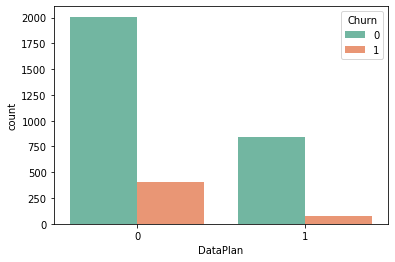

In [14]:
sns.countplot(x='DataPlan', data=df,  hue='Churn', palette='Set2')
plt.show()

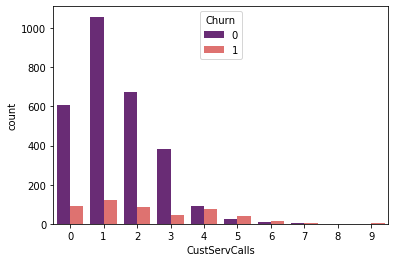

In [15]:
sns.countplot(x='CustServCalls', data=df,  hue='Churn', palette='magma')
plt.show()

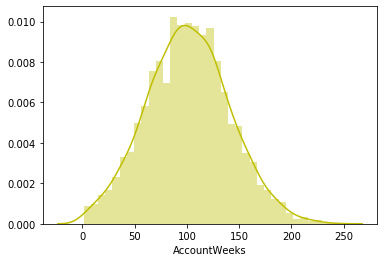

In [16]:
# plotting distribution for numerical variables
num_var = ['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
sns.distplot(a=df['AccountWeeks'], color='y')
plt.show()

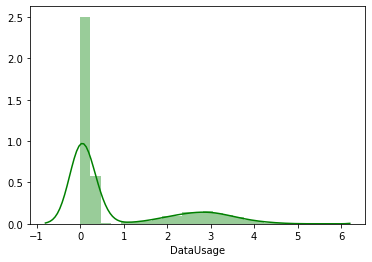

In [17]:
sns.distplot(a=df['DataUsage'], color='g')
plt.show()

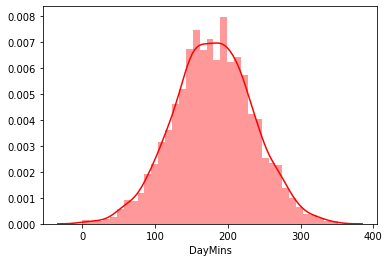

In [18]:
sns.distplot(a=df['DayMins'], color='r')
plt.show()

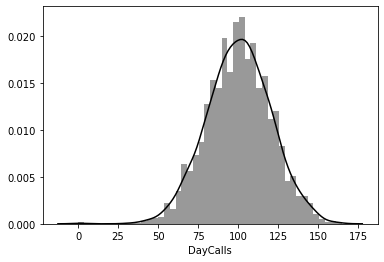

In [19]:
sns.distplot(a=df['DayCalls'], color='k')
plt.show()

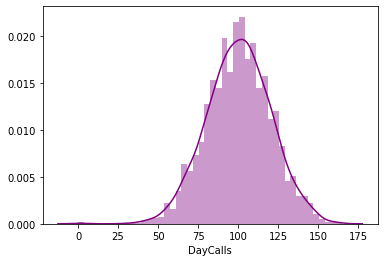

In [20]:
sns.distplot(a=df['DayCalls'], color='purple')
plt.show()

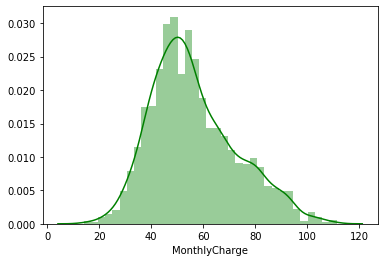

In [21]:
sns.distplot(a=df['MonthlyCharge'], color='g')
plt.show() #right skewed

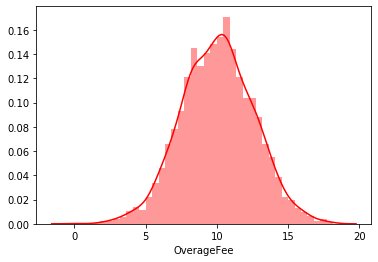

In [22]:
sns.distplot(a=df['OverageFee'], color='r')
plt.show()

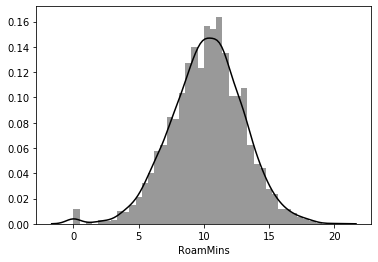

In [23]:
sns.distplot(a=df['RoamMins'], color='k')
plt.show()

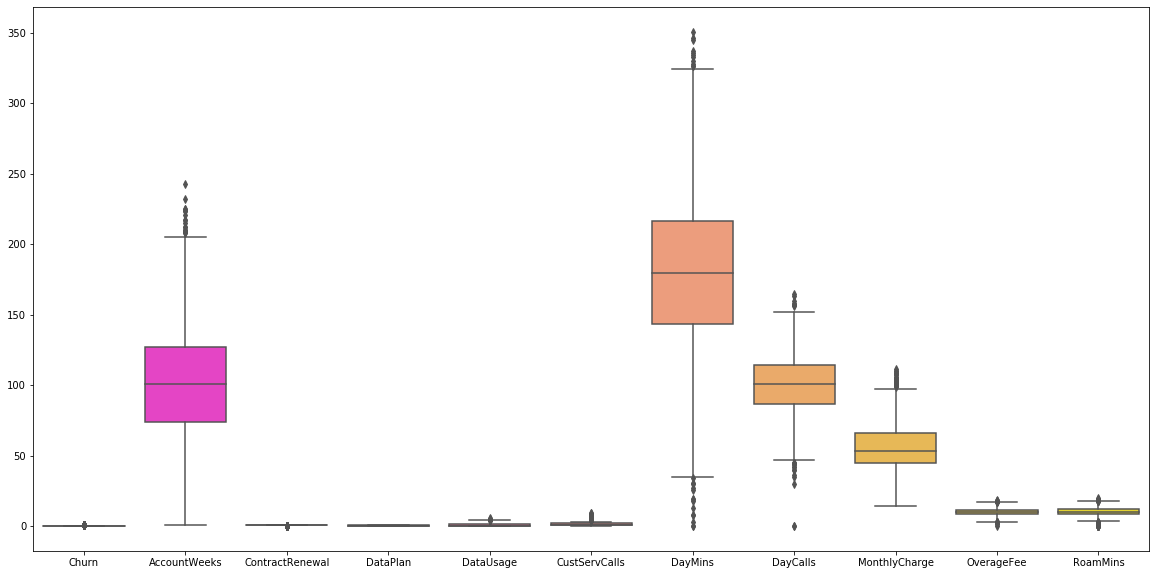

In [24]:
# Checking for the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df, palette='spring')
plt.show()

In [25]:
# Total outliers in the following features, excluding 'CustServCalls'
outliers = ['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']

dfo = df.copy()
for i in outliers:
    q1 = dfo[i].quantile(.25)
    q3 = dfo[i].quantile(.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    dfo = dfo[(dfo[i]>=ll) & (dfo[i]<=ul)]

In [26]:
dfo_shape = dfo.shape[0]

In [27]:
# checking the % of outliers removed
print('df shape:', df_shape)
print('dfo shape:', dfo_shape)
print('Percentage of outliers removed:', ((df_shape-dfo_shape)/df_shape)*100)

df shape: 3333
dfo shape: 3158
Percentage of outliers removed: 5.2505250525052505


In [28]:
dfo.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [29]:
# checking the % of different classes in target
dfo.Churn.value_counts(normalize=True)

0    0.860355
1    0.139645
Name: Churn, dtype: float64

In [30]:
# counting total churned vs. not-churned
a = dfo.iloc[:,1:]
b = dfo.iloc[:,0]
churned = dfo.loc[b==1]
not_churned = dfo.loc[b==0]

In [31]:
churned.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7
33,1,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8
41,1,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6
48,1,119,1,0,0.00,5,159.1,114,47.0,11.57,8.8


In [32]:
not_churned.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.0,0,223.4,98,57.0,11.03,6.3


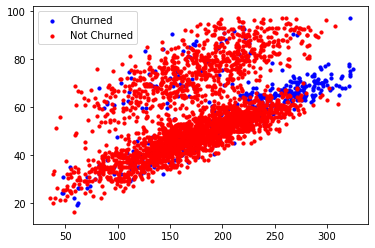

In [33]:
# vizualizinf the target variable through scatterplot (Taking DayMins & MonthlyCharge )
plt.scatter(churned.iloc[:, 6], churned.iloc[:, 8], s=10, label='Churned', color ='blue')
plt.scatter(not_churned.iloc[:, 6], not_churned.iloc[:,8], s=10, label='Not Churned', color ='red')
plt.legend()
plt.show()

##### Standardizining the data

In [34]:
from scipy.stats import zscore
dfo_scaled = dfo.drop('Churn',1).apply(zscore)
dfo_scaled['Churn'] = dfo['Churn']
dfo_scaled.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,0.706707,0.321596,1.637270,1.529682,-0.433472,1.646781,0.491358,2.110767,-0.069438,-0.097249,0
1,0.169114,0.321596,1.637270,2.333475,-0.433472,-0.336055,1.164326,1.663279,-0.106118,1.348266,0
2,0.937104,0.321596,-0.610773,-0.640557,-1.194396,1.231056,0.698425,-0.254527,-1.622219,0.762246,0
4,-0.650076,-3.109489,-0.610773,-0.640557,1.088377,-0.238350,0.646658,-0.957723,-1.067946,-0.058181,0
5,0.450710,-3.109489,-0.610773,-0.640557,-1.194396,0.847899,-0.129843,0.065107,0.403325,-1.542764,0


In [35]:
dfo_scaled['Churn']=dfo_scaled['Churn'].astype(int)

In [36]:
dfo_scaled.dtypes

AccountWeeks       float64
ContractRenewal    float64
DataPlan           float64
DataUsage          float64
CustServCalls      float64
DayMins            float64
DayCalls           float64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
Churn                int32
dtype: object

#### Visualization using Decision Tree

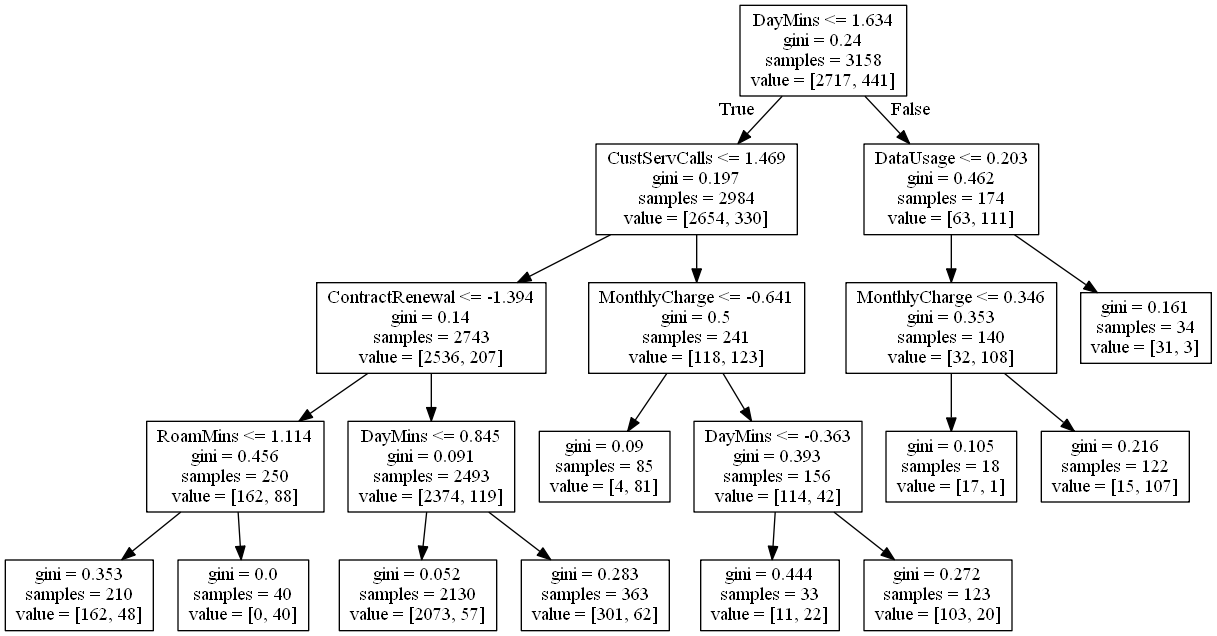

In [37]:
X = dfo_scaled.drop('Churn',axis=1)
y = dfo_scaled['Churn']

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1, max_depth=5, max_leaf_nodes=10) 

dtc.fit(X,y)

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Here we see, that DayMin is the most significant variable for the first split.

**Checking Co-relation**

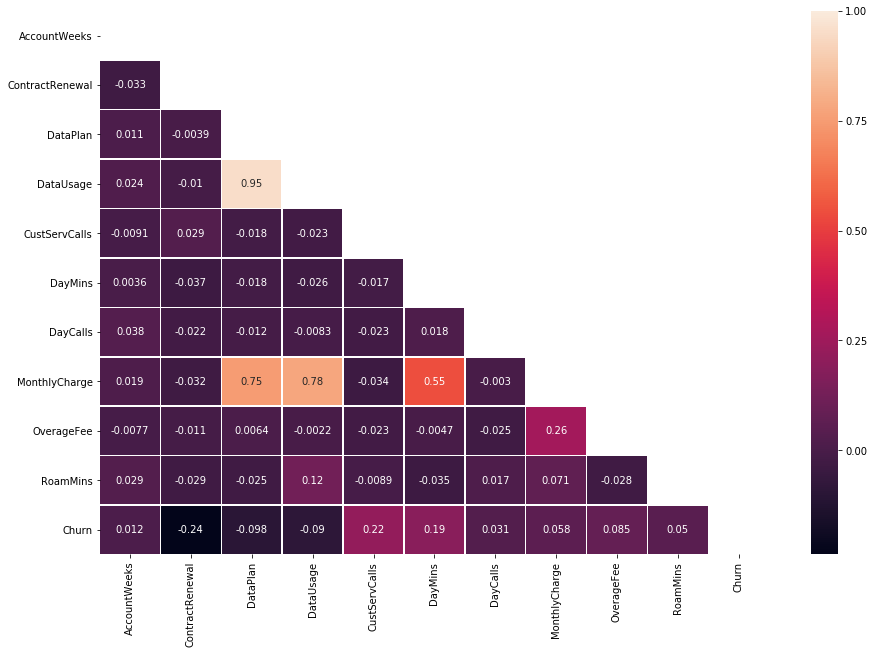

In [38]:
# Correlation between features
plt.figure(figsize=(15,10))
corr = dfo_scaled.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
plt.show()

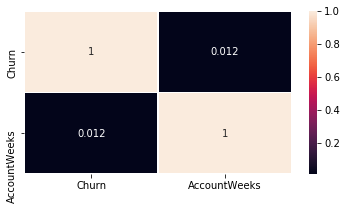

Corelation between Churn & AccountWeeks is: 0.0123
which is negligible co-relation


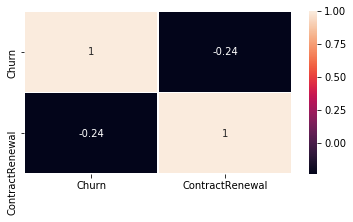

Corelation between Churn & ContractRenewal is: -0.2372
which is low negative co-relation


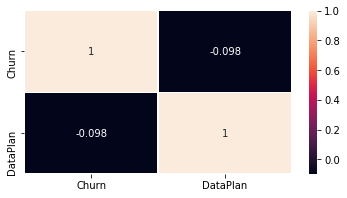

Corelation between Churn & DataPlan is: -0.0982
which is negligible co-relation


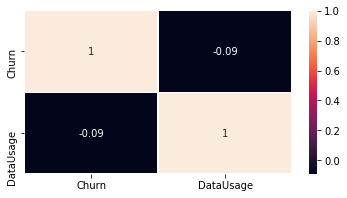

Corelation between Churn & DataUsage is: -0.0904
which is negligible co-relation


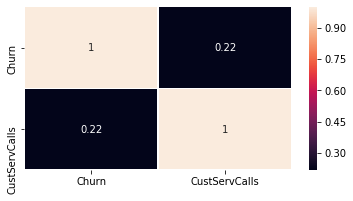

Corelation between Churn & CustServCalls is: 0.2188
which is low positive co-relation


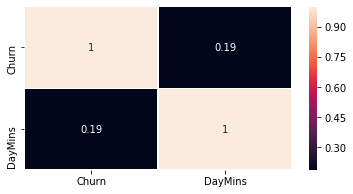

Corelation between Churn & DayMins is: 0.1888
which is negligible co-relation


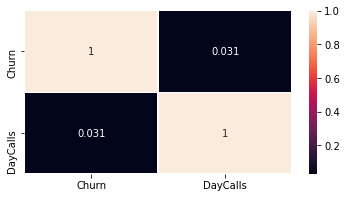

Corelation between Churn & DayCalls is: 0.0314
which is negligible co-relation


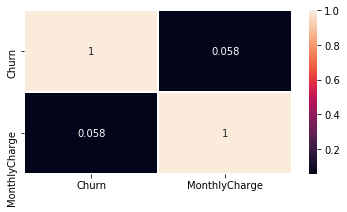

Corelation between Churn & MonthlyCharge is: 0.0578
which is negligible co-relation


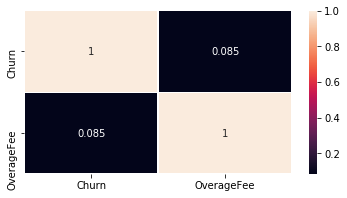

Corelation between Churn & OverageFee is: 0.085
which is negligible co-relation


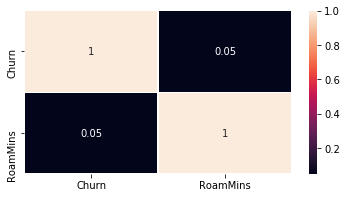

Corelation between Churn & RoamMins is: 0.0499
which is negligible co-relation


In [39]:
# Corelation within features
for i in dfo_scaled.drop('Churn',1):
    plt.figure(figsize=(6,3))
    corr = dfo_scaled[['Churn',i]].corr()
    #mask = np.zeros_like(corr, dtype=np.bool)
    #mask[np.triu_indices_from(mask)]=True
    #sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
    sns.heatmap(corr, linewidth=0.5, annot=True)
    plt.show()
    print("Corelation between Churn &",i,'is:', round(corr.iloc[1,0],4))
    if round(corr.iloc[1,0],4)>=0.5:
        print('which is high positive co-relation')
    elif 0.2<=round(corr.iloc[1,0],4)<0.5:
        print('which is low positive co-relation')
    elif -0.2<round(corr.iloc[1,0],4)<0.2:
        print('which is negligible co-relation')
    elif -0.5<round(corr.iloc[1,0],4)<=-0.2:
        print('which is low negative co-relation')
    elif round(corr.iloc[1,0],4)<=-0.5:
        print('which is high negative co-relation')


#### Model Building (Stats)

In [40]:
X = dfo_scaled.drop('Churn',axis=1)
y = dfo_scaled['Churn']
X = X.assign(const=1)

import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.326064
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3158
Model:                          Logit   Df Residuals:                     3147
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 Jan 2020   Pseudo R-squ.:                  0.1935
Time:                        23:42:31   Log-Likelihood:                -1029.7
converged:                       True   LL-Null:                       -1276.8
Covariance Type:            nonrobust   LLR p-value:                7.442e-100
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
AccountWeeks        0.0129      0.057      0.226      0.821      -0.099       0.125
ContractRenewal    -0.5526      0.044    -12.701      0.000      -0.638      -0.467
DataPlan           -0.4621      0.259     -1.785      0.074      -0.969       0.045
DataUsage           0.6315      2.472      0.255      0.798      -4.214       5.477
CustServCalls       0.6944      0.053     13.199      0.000       0.591       0.797
DayMins             1.0268      1.755      0.585      0.559      -2.414       4.467
DayCalls            0.1060      0.057      1.863      0.062      -0.006       0.217
MonthlyCharge      -0.6662      3.091     -0.215      0.829      -6.725       5.393
OverageFee          0.5149      0.827      0.623      0.534      -1.106       2.136
RoamMins            0.1816      0.063      2.885      0.004       0.058       0.305
const              -2.2931      0.072    -31.969      0.000      -2.434      -2.153
===================================================================================
"""

In [41]:
# Check for multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif}, index=X.columns)

,vif
AccountWeeks,1.004907
ContractRenewal,1.005396
DataPlan,14.352485
DataUsage,1878.633029
CustServCalls,1.003037
DayMins,949.665277
DayCalls,1.003618
MonthlyCharge,2948.485446
OverageFee,210.767351
RoamMins,1.324392


In [42]:
# Using Backward Elimination to check, which features are significantly not important.

X = dfo_scaled.drop(['Churn'],axis=1)
y = dfo_scaled['Churn']

cols = list(X.columns)
p= []
while (len(cols)>1):
    
    X = X[cols]
    model = sm.Logit(y,X).fit().pvalues
    p = pd.Series(model.values[1:],index =X.columns[1:])      
    pmax = max(p)
    pid=p.idxmax()
    if(pmax>0.05):
        cols.remove(pid)
        print('variable removed:',pid,pmax)
    else:
        break
cols

Optimization terminated successfully.
         Current function value: 0.652540
         Iterations 5
variable removed: MonthlyCharge 0.9808948602078664
Optimization terminated successfully.
         Current function value: 0.652540
         Iterations 5
variable removed: DataUsage 0.7414092739112312
Optimization terminated successfully.
         Current function value: 0.652557
         Iterations 5
variable removed: DayCalls 0.2546418343845652
Optimization terminated successfully.
         Current function value: 0.652763
         Iterations 5


['AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'CustServCalls',
 'DayMins',
 'OverageFee',
 'RoamMins']

We will drop the features based on, significance level(p-value) and vif.

Here we see high multi collinearity.

In [43]:
# Dropping insignificant variables
X = dfo_scaled.drop(['Churn','MonthlyCharge', 'DataUsage', 'DayCalls', 'AccountWeeks'],axis=1)
y = dfo_scaled['Churn']
X = X.assign(const=1)

import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.326656
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3158
Model:                          Logit   Df Residuals:                     3151
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Jan 2020   Pseudo R-squ.:                  0.1921
Time:                        23:42:31   Log-Likelihood:                -1031.6
converged:                       True   LL-Null:                       -1276.8
Covariance Type:            nonrobust   LLR p-value:                9.247e-103
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContractRenewal    -0.5545      0.043    -12.763      0.000      -0.640      -0.469
DataPlan           -0.3621      0.066     -5.484      0.000      -0.492      -0.233
CustServCalls       0.6891      0.052     13.160      0.000       0.586       0.792
DayMins             0.6496      0.060     10.878      0.000       0.533       0.767
OverageFee          0.3311      0.059      5.620      0.000       0.216       0.447
RoamMins            0.1924      0.058      3.301      0.001       0.078       0.307
const              -2.2869      0.071    -32.042      0.000      -2.427      -2.147
===================================================================================
"""

In [44]:
# Check for multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif}, index=X.columns)

,vif
ContractRenewal,1.003248
DataPlan,1.001362
CustServCalls,1.002047
DayMins,1.003349
OverageFee,1.001544
RoamMins,1.003761
const,1.000000


In [45]:
logit.params

ContractRenewal   -0.554490
DataPlan          -0.362122
CustServCalls      0.689060
DayMins            0.649594
OverageFee         0.331055
RoamMins           0.192367
const             -2.286946
dtype: float64

**Interpretation:**

All coef. are significant.

As ContractRenewal & DataPlan increases Churn decreases.

As CustServCalls, DayMins, OverageFee, RoamMins increases Churn increases.

**Log of Odds**

As ContractRenewal increases by 1, Log(Odds) of Churn decreases by 0.55

As DataPlan increases by 1, Log(Odds) of Churn decreases by 0.36

As CustServCalls increases by 1, Log(Odds) of Churn increases by 0.68

As DayMins increases by 1, Log(Odds) of Churn increases by 0.64

As OverageFee increases by 1, Log(Odds) of Churn increases by 0.33

As RoamMins increases by 1, Log(Odds) of Churn increases by 0.19

In [46]:
logit.pvalues

ContractRenewal     2.644992e-37
DataPlan            4.153322e-08
CustServCalls       1.491938e-39
DayMins             1.470870e-27
OverageFee          1.911541e-08
RoamMins            9.645010e-04
const              2.807777e-225
dtype: float64

In [47]:
np.exp(logit.params)

ContractRenewal    0.574365
DataPlan           0.696197
CustServCalls      1.991843
DayMins            1.914764
OverageFee         1.392437
RoamMins           1.212115
const              0.101576
dtype: float64

**Inference:**

**Exponential of Odds**

As ContractRenewal increases by 1, Log(Odds) of Churn decreases by 0.55 = (1 - 0.574365)(Appx.)

As DataPlan increases by 1, Log(Odds) of Churn decreases by 0.36 = (1 - 0.696197)(Appx.)

As CustServCalls increases by 1, Log(Odds) of Churn increases by 0.68 = (1 - 1.991843)(Appx.)

As DayMins increases by 1, Log(Odds) of Churn increases by 0.64 = (1 - 1.914764)(Appx.)

As OverageFee increases by 1, Log(Odds) of Churn increases by 0.33 = (1 - 1.392437)(Appx.)

As RoamMins increases by 1, Log(Odds) of Churn increases by 0.19 = (1 - 1.212115)(Appx.)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = logit.predict(X)

y_pred = y_prob.apply(lambda x: 0 if x<0.5 else 1)
print('\033[1m Confusion Matrix: \033[0m\n',confusion_matrix(y, y_pred))
print('\n \033[1m Classification Report:\033[0m\n',classification_report(y,y_pred))
print('\n \033[1m Predicted values for 1 & 0: \033[0m\n', y_pred.value_counts())

 Confusion Matrix: 
 [[2655   62]
 [ 370   71]]

  Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      2717
           1       0.53      0.16      0.25       441

    accuracy                           0.86      3158
   macro avg       0.71      0.57      0.59      3158
weighted avg       0.83      0.86      0.83      3158


  Predicted values for 1 & 0: 
 0    3025
1     133
dtype: int64


In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression:",accuracy_score(y, y_pred))

Accuracy of Logistic Regression: 0.863204559848005


#### Train-Test Split

In [50]:
#Splitting the data
X = dfo_scaled.drop('Churn',1)
y = dfo_scaled['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

#### Handling inbalanced data

In [51]:
# Using Oversampling Technique, for handling imbalanced data
Xy_train = pd.concat([X_train,y_train], axis=1)


Xy_train0 = Xy_train.loc[Xy_train['Churn'] == 0]
Xy_train1 = Xy_train.loc[Xy_train['Churn'] == 1]


len1= len(Xy_train1)

len0= len(Xy_train0)


Xy_train1_os= Xy_train1.sample(len1, replace=True)

Xy_train_os = pd.concat([Xy_train1_os, Xy_train0],axis=0)

y_train_os = Xy_train_os['Churn']
X_train_os = Xy_train_os.drop('Churn',axis=1)


### Model Building (ML)

**Logistic Regression**

In [52]:
# Logistic Regression

X_train = X_train_os
y_train =  y_train_os

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear',fit_intercept=True)
logreg.fit(X_train,y_train)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict (X_train)


y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy of Logistic Regression_oversampling on Train:",accuracy_score(y_train, y_pred_train))
print("Accuracy of Logistic Regression_Oversampling on Test:",accuracy_score(y_test, y_pred))
Logistic_Regression_Accuracy_Train_Oversampling = accuracy_score(y_train, y_pred_train)
Logistic_Regression_Accuracy_Test_Oversampling = accuracy_score(y_test, y_pred)


Accuracy of Logistic Regression_oversampling on Train: 0.8588235294117647
Accuracy of Logistic Regression_Oversampling on Test: 0.869198312236287


AUC of Train 0.7997477056020592


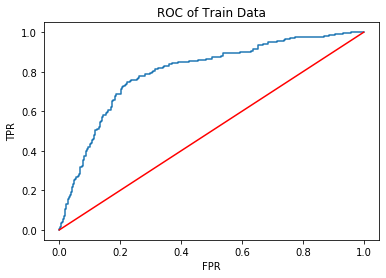

In [53]:
# Reciever Operating Charecteristic Curve
from sklearn.metrics import roc_auc_score, roc_curve

print('AUC of Train',roc_auc_score(y_train, y_prob_train))

fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.title('ROC of Train Data')
plt.show()

AUC of Test 0.8225638740344624


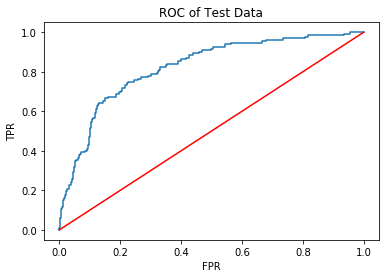

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

print('AUC of Test',roc_auc_score(y_test, y_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.title('ROC of Test Data')
plt.show()

**Random Forest Classifier**

In [56]:
X_train = X_train_os
y_train =  y_train_os

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train,y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score

print('Accuracy of Random Forest_Oversampling - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of Random Forestversampling_Oversampling - Test', accuracy_score(y_pred,y_test))
Random_Forest_Accuracy_Train_Oversampling = accuracy_score(y_pred_train,y_train)
Random_Forest_Accuracy_Test_Oversampling = accuracy_score(y_pred,y_test)

Accuracy of Random Forest_Oversampling - Train 0.995475113122172
Accuracy of Random Forestversampling_Oversampling - Test 0.9388185654008439


**Support Vector Machine**

In [58]:
X_train = X_train_os
y_train =  y_train_os

from sklearn.svm import SVC
svc = SVC(gamma =1, probability =True, random_state=1)

svc.fit(X_train, y_train)

y_pred_train=svc.predict(X_train)
y_prob_train=svc.predict_proba(X_train)[:,1]
    
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score

print('Accuracy of SVM Train_Oversampling: ',accuracy_score(y_pred_train, y_train) )
print('Accuracy of SVM Test_Oversampling: ',accuracy_score(y_pred, y_test) )
SVM_Accuracy_Train_Oversampling = accuracy_score(y_pred_train, y_train) 
SVM_Accuracy_Test_Oversampling = accuracy_score(y_pred, y_test) 


Accuracy of SVM Train_Oversampling:  0.9819004524886877
Accuracy of SVM Test_Oversampling:  0.8713080168776371


**LightGBM**

In [59]:
X_train = X_train_os
y_train =  y_train_os

import lightgbm as lgb
lgbc = lgb.LGBMClassifier(random_state=1)

lgbc.fit(X_train,y_train)

y_pred_train = lgbc.predict(X_train)
y_prob_train = lgbc.predict_proba(X_train)[:,1]

y_pred = lgbc.predict(X_test)
y_prob = lgbc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score

print('Accuracy of LGBM_Oversampling - Train', accuracy_score(y_pred_train,y_train))
print('Accuracy of LGBM_Oversampling - Test', accuracy_score(y_pred,y_test))
LGBM_Accuracy_Train_Oversampling = accuracy_score(y_pred_train,y_train)
LGBM_Accuracy_Test_Oversampling = accuracy_score(y_pred,y_test)


Accuracy of LGBM_Oversampling - Train 1.0
Accuracy of LGBM_Oversampling - Test 0.9409282700421941


**Comparing the accuracy of all the above Algorithms**

In [60]:
# Comparing all the Algorithms

print('\033[1m Logistic Regression:\033[0m')
print('\nLogistic_Regression_Accuracy_Train_Oversampling',Logistic_Regression_Accuracy_Train_Oversampling)
print('Logistic_Regression_Accuracy_Test_Oversampling',Logistic_Regression_Accuracy_Test_Oversampling)

print('\n\033[1m Random Forest:\033[0m')
print('\nRandom_Forest_Accuracy_Train_Oversampling',Random_Forest_Accuracy_Train_Oversampling)
print('Random_Forest_Accuracy_Test_Oversampling',Random_Forest_Accuracy_Test_Oversampling)

print('\n\033[1m Support Vector Machine:\033[0m')
print('\nSVM_Accuracy_Train_Oversampling',SVM_Accuracy_Train_Oversampling)
print('SVM_Accuracy_Test_Oversampling',SVM_Accuracy_Test_Oversampling)

print('\n\033[1m LightGBM:\033[0m')
print('\nLGBM_Accuracy_Train_Oversampling',LGBM_Accuracy_Train_Oversampling)
print('LGBM_Accuracy_Test_Oversampling',LGBM_Accuracy_Test_Oversampling)


 Logistic Regression:

Logistic_Regression_Accuracy_Train_Oversampling 0.8588235294117647
Logistic_Regression_Accuracy_Test_Oversampling 0.869198312236287

 Random Forest:

Random_Forest_Accuracy_Train_Oversampling 0.995475113122172
Random_Forest_Accuracy_Test_Oversampling 0.9388185654008439

 Support Vector Machine:

SVM_Accuracy_Train_Oversampling 0.9819004524886877
SVM_Accuracy_Test_Oversampling 0.8713080168776371

 LightGBM:

LGBM_Accuracy_Train_Oversampling 1.0
LGBM_Accuracy_Test_Oversampling 0.9409282700421941


**Best accuracy is given by Random Forest & LightGBM Algo's.**